#  Objetivo:

##   Somos uma empresa que trabalha com materiais esportivos, e temos muitos clientes que são surfistas, e gostam de se aventurar no mundo inteiro, então decidimos fazer uma pesquisa com algumas curiosidades sobre os tubarões, para também informarmos aos nossos clientes.

##  Perguntas:
    1) Em qual país há mais ataques de tubarão?
    2) E qual país que há mais casos fatais?
    3) Em que ano houve mais ataques?


#  Conclusão:

##  Onde há mais ataques mundial - Estados Unidos seguido pela Australia, a alta densidade demografica ao longo da costa sul da Australia e na costa leste dos Estados Unidos indica que há um grande número de pessoas que gostam de tomar banho nesses lugares.

##  As atividades com mais acidentes - são os nadadores.

## Mas isso não tem nada a ver com o fato de os tubarões atacam os banhistas ou outros tipos de atividades, os humanos não entram na cadeia alimentar dos tubarões, eles só atacam porque os movimentos que os movimentos nas águas os atraem, achando que é um predador(como tartaruga marinho, leão marinho e outros) (Fonte:bbc.com, https://www.sharkattackfile.ne)

# Analisando e limpando dados:

## Importando a biblioteca e os dados

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import re

In [2]:
attacks = pd.read_csv('data/attacks.csv')

In [5]:
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## Verificando as colunas 

In [243]:
attacks.isnull().sum().sort_values(ascending = False)

time                      3354
species                   2838
age                       2831
date                       844
sex                        565
activity                   544
location                   540
fatal                      539
area                       455
name                       210
country                     50
injury                      28
investigator or source      17
type                         4
year                         2
case number                  1
dtype: int64

In [244]:
attacks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   case number             6301 non-null   object        
 1   date                    5458 non-null   datetime64[ns]
 2   year                    6300 non-null   float64       
 3   type                    6298 non-null   object        
 4   country                 6252 non-null   object        
 5   area                    5847 non-null   object        
 6   location                5762 non-null   object        
 7   activity                5758 non-null   object        
 8   name                    6092 non-null   object        
 9   sex                     5737 non-null   object        
 10  age                     3471 non-null   object        
 11  injury                  6274 non-null   object        
 12  fatal                   5763 non-null   object  

## Excluindo colunas irrelevantes

In [3]:
attacks = attacks.drop(columns =['pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'])

In [7]:
attacks.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"


In [226]:
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

## Excluindo linhas sem informações

In [4]:
attacks = attacks.dropna(thresh = 2)      

In [228]:
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


## Ajustando os nomes das colunas

In [229]:
attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source'],
      dtype='object')

In [5]:
attacks =attacks.rename(columns = { 'Sex ':'Sex',  'Species ':'Species' })

In [6]:
attacks.columns = ['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time',
       'species', 'investigator or source']

In [7]:
attacks.head(2)

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator or source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"


## Tratamento as datas

In [8]:
def try_datetime(value):
    try: 
        return pd.to_datetime(value)
    except:
        return np.nan

In [9]:
attacks['date'] = attacks.date.map(try_datetime)

In [10]:
attacks['years'] = pd.to_datetime(attacks['date']).dt.year
attacks['years']

0       2018.0
1       2018.0
2       2018.0
3       2018.0
4       2018.0
         ...  
6297       NaN
6298       NaN
6299       NaN
6300       NaN
6301       NaN
Name: years, Length: 6302, dtype: float64

In [105]:
attacks['years'].unique()

array([2018.,   nan, 2017., 2016., 2015., 2014., 2013., 2012., 2011.,
       2008., 2010., 2009., 2006., 2007., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966.,
       1965., 1964., 1954., 1963., 1962., 1961., 1960., 1959., 1958.,
       1957., 1956., 1955., 1953., 1952., 1951., 1950., 1949., 1948.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

## Tratando os países e as areas

In [13]:
def country_lines(rows):
    try:
        rows = rows.lower().strip()
        return rows
    except:
        return rows

In [14]:
attacks['country'] = attacks['country'].apply(country_lines)

In [15]:
attacks['country']=np.where(attacks['country']=='asia?','asia',attacks['country'])
attacks['country']=np.where(attacks['country']=='ceylon (sri lanka)','sri lanka',attacks['country'])
attacks['country']=np.where(attacks['country']=='maldive islands','maldives',attacks['country'])
attacks['country']=np.where(attacks['country']=='okinawa','japan',attacks['country'])
attacks['country']=np.where(attacks['country']=='red sea?','red sea',attacks['country'])
attacks['country']=np.where(attacks['country']=='reunion island','reunion',attacks['country'])
attacks['country']=np.where(attacks['country']=='korea','south korea',attacks['country'])
attacks['country']=np.where(attacks['country']=='st. maartin','st.martin',attacks['country'])
attacks['country']=np.where(attacks['country']=='sudan?','sudan',attacks['country'])
attacks['country']=np.where(attacks['country']=='united arab emirates (uae)','united arab emirates',attacks['country'])

In [16]:
attacks['country'].unique()

array(['usa', 'australia', 'mexico', 'brazil', 'england', 'south africa',
       'thailand', 'costa rica', 'maldives', 'bahamas', 'new caledonia',
       'ecuador', 'malaysia', 'libya', nan, 'cuba', 'mauritius',
       'new zealand', 'spain', 'samoa', 'solomon islands', 'japan',
       'egypt', 'st helena, british overseas territory', 'comoros',
       'reunion', 'french polynesia', 'united kingdom',
       'united arab emirates', 'philippines', 'indonesia', 'china',
       'columbia', 'cape verde', 'fiji', 'dominican republic',
       'cayman islands', 'aruba', 'mozambique', 'puerto rico', 'italy',
       'atlantic ocean', 'greece', 'st. martin', 'france',
       'papua new guinea', 'trinidad & tobago', 'kiribati', 'israel',
       'diego garcia', 'taiwan', 'jamaica', 'palestinian territories',
       'guam', 'seychelles', 'belize', 'nigeria', 'tonga', 'scotland',
       'canada', 'croatia', 'saudi arabia', 'chile', 'antigua', 'kenya',
       'russia', 'turks & caicos', 'azores', 'sou

In [17]:
def area_lines(rows):
    try:
        rows = rows.lower().strip()
        return rows
    except:
        return rows

In [18]:
attacks['area'] = attacks['area'].apply(area_lines)

## Tratamento nas atividades e fatal

In [58]:
attacks.loc[attacks['activity'].str.contains('surf', case=False, na=False), 'activity'] = 'Surfing'
attacks.loc[attacks['activity'].str.contains('boarding', case=False, na=False), 'activity'] = 'Surfing'
attacks.loc[attacks['activity'].str.contains('swim', case=False, na=False), 'activity'] = 'Swimming'
attacks.loc[attacks['activity'].str.contains('fishing', case=False, na=False), 'activity'] = 'Fishing'
attacks.loc[attacks['activity'].str.contains('aquarium', case=False, na=False), 'activity'] = 'Fishing'
attacks.loc[attacks['activity'].str.contains('hunt', case=False, na=False), 'activity'] = 'Fishing'
attacks.loc[attacks['activity'].str.contains('trap', case=False, na=False), 'activity'] = 'Fishing'
attacks.loc[attacks['activity'].str.contains('walk', case=False, na=False), 'activity'] = 'Swimming'
attacks.loc[attacks['activity'].str.contains('wading', case=False, na=False), 'activity'] = 'Swimming'
attacks.loc[attacks['activity'].str.contains('float', case=False, na=False), 'activity'] = 'Swimming'
attacks.loc[attacks['activity'].str.contains('Treading water', case=False, na=False), 'activity'] = 'Swimming'
attacks.loc[attacks['activity'].str.contains('pull', case=False, na=False), 'activity'] = 'Fishing'
attacks.loc[attacks['activity'].str.contains('pick', case=False, na=False), 'activity'] = 'Fishing'
attacks.loc[attacks['activity'].str.contains('bath', case=False, na=False), 'activity'] = 'Swimming'
attacks.loc[attacks['activity'].str.contains('diving', case=False, na=False), 'activity'] = 'Diving'
attacks.loc[attacks['activity'].str.contains('snorkel', case=False, na=False), 'activity'] = 'Diving'
attacks.loc[attacks['activity'].str.contains('photo', case=False, na=False), 'activity'] = 'Photo shoot'
attacks.loc[attacks['activity'].str.contains('film', case=False, na=False), 'activity'] = 'Filming'
attacks.loc[attacks['activity'].str.contains('float', case=False, na=False), 'activity'] = 'Floating'
attacks.loc[attacks['activity'].str.contains('boarding', case=False, na=False), 'activity'] = 'Boarding'
attacks.loc[attacks['activity'].str.contains('wash', case=False, na=False), 'activity'] = 'Washing'

In [51]:
def activity_lines(rows):
    try:
        rows = rows.lower()        
        return rows
    except:
        return rows

In [52]:
attacks['activity'] = attacks['activity'].apply(activity_lines)

In [57]:
attacks['activity'].value_counts().head(10)

swimming          1563
surfing           1410
fishing           1166
diving             593
standing            99
kayaking            33
fell overboard      32
washing             20
sea disaster        14
canoeing            14
Name: activity, dtype: int64

In [33]:
attacks['fatal'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [23]:
def fatal_lines(rows):
    try:
        rows = rows.lower().strip()
        return rows
    except:
        return rows

In [24]:
attacks['fatal'] = attacks['fatal'].apply(fatal_lines)

In [25]:
attacks['fatal']=np.where(attacks['fatal']=='m','n',attacks['fatal']) #Erro de digitação
attacks['fatal']=np.where(attacks['fatal']=='2017','n',attacks['fatal']) #Pelo contexto não parece ser fatal
attacks['fatal']=np.where(attacks['fatal']=='unknown',0,attacks['fatal']) #transformar unknown para o

In [26]:
attacks['fatal'].value_counts()

n    4303
y    1389
0      71
Name: fatal, dtype: int64

## Analisando os dados

In [71]:
attacks.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator or source', 'years'],
      dtype='object')

In [45]:
attacks_shark = attacks[['years', 'country', 'area', 'activity', 'fatal']]

In [46]:
attacks_shark

,years,country,area,activity,fatal
0,2018.0,usa,california,paddling,n
1,2018.0,usa,georgia,standing,n
2,2018.0,usa,hawaii,surfing,n
3,2018.0,australia,new south wales,surfing,n
4,2018.0,mexico,colima,diving,n
...,...,...,...,...,...
6297,NaN,australia,western australia,diving,y
6298,NaN,australia,western australia,diving,y
6299,NaN,usa,north carolina,swimming,y
6300,NaN,panama,NaN,NaN,y


# Respondendo as perguntas:

## Em qual país há mais ataques de tubarão?

In [29]:
attacks_shark['country'].value_counts().head(10)

usa                 2229
australia           1338
south africa         579
papua new guinea     134
new zealand          128
brazil               112
bahamas              109
mexico                90
italy                 71
fiji                  65
Name: country, dtype: int64

<AxesSubplot:>

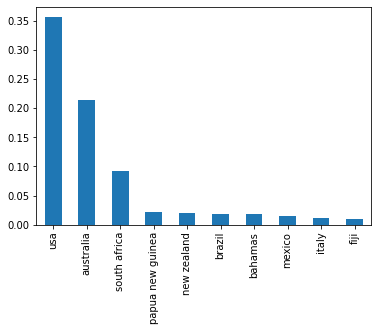

In [159]:
attacks_shark['country'].value_counts(normalize = True).head(10).plot(kind = 'bar')

In [30]:
attacks_usa = attacks_shark[attacks_shark['country'] == 'usa']

In [31]:
attacks_usa['area'].value_counts().head()

florida           1038
hawaii             298
california         290
south carolina     160
north carolina     104
Name: area, dtype: int64

## E qual país que há mais casos fatais?

In [32]:
attacks_fatal=attacks_shark.loc[attacks_shark['fatal']=='y',:]
attacks_fatal[['years','fatal','country']].groupby(by=['fatal','country']).count().sort_values(by='years', ascending=False).reset_index()

,fatal,country,years
0,y,australia,245
1,y,usa,159
2,y,south africa,94
3,y,papua new guinea,43
4,y,brazil,36
...,...,...,...
134,y,libya,0
135,y,marshall islands,0
136,y,mediterranean sea,0
137,y,monaco,0


In [33]:
total_fatal=len(attacks_fatal.loc[attacks_fatal['fatal']=='y','fatal'])
total_fatal

1389

In [34]:
australia_fatal=len(attacks_fatal.loc[(attacks_fatal['fatal']=='y') & (attacks_fatal['country']=='australia'),'fatal'])
australia_fatal

283

## Em que ano houve mais ataques?

In [35]:
attacks_shark['years'].value_counts()

2015.0    142
2017.0    126
2016.0    125
2014.0    118
2013.0    116
         ... 
1846.0      1
1703.0      1
1807.0      1
1780.0      1
1748.0      1
Name: years, Length: 219, dtype: int64

In [36]:
attacks_shark[['country', 'years']].groupby('years', sort=False).count().reset_index().head(60)

,years,country
0,2018.0,51
1,2017.0,126
2,2016.0,125
3,2015.0,142
4,2014.0,117
5,2013.0,116
6,2012.0,113
7,2011.0,115
8,2008.0,111
9,2010.0,94


## E qual o tipo de atividades que há mais casos?

In [49]:
attacks_shark['activity'].value_counts().head(20)

swimming               1563
surfing                1410
fishing                1166
diving                  593
standing                 99
kayaking                 33
fell overboard           32
washing                  20
sea disaster             14
canoeing                 14
rowing                   12
fell into the water       9
sailing                   9
filming                   8
boating                   7
playing                   7
shipwreck                 6
murder                    6
paddleskiing              5
boat                      5
Name: activity, dtype: int64

In [48]:
attacks_shark['activity'].value_counts(normalize= True).head(10)

swimming          0.271448
surfing           0.244877
fishing           0.202501
diving            0.102987
standing          0.017193
kayaking          0.005731
fell overboard    0.005557
washing           0.003473
sea disaster      0.002431
canoeing          0.002431
Name: activity, dtype: float64

In [59]:
#attacks_shark['activity'].value_counts(normalize= True).head(10).plot(kind = 'bar', fontsize = 20)